# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Ученая степень', 'Высшее', 'Неполное среднее', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее'}


MARITAL_STATUS
{'Состою в браке', 'Гражданский брак', 'Вдовец/Вдова', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Страхование', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Наука', 'Энергетика', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Другие сферы', 'Маркетинг', 'Информационные услуги', 'Информационные технологии', 'Химия/Парфюмерия/Фармацевтика', 'Образование', 'Туризм', 'Сборочные производства', 'Торговля', 'Государственная служба', 'Транспорт', 'Недвижимость', 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Строительство', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Развлечения/Искусство', 'Банк/Финансы', 'Юридические услуги/нотариальные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
df.isnull().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

#### Задание 3. Фунция предобработки

In [16]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    #Удаляло идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    #Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    #Что-то делала с пропусками 
    df_output = df_output[~df['GEN_INDUSTRY'].isnull()]
    df_output = df_output[~df['GEN_TITLE'].isnull()]
    df_output = df_output[~df['ORG_TP_STATE'].isnull()]
    df_output = df_output[~df['ORG_TP_FCAPITAL'].isnull()]
    df_output = df_output[~df['JOB_DIR'].isnull()]
    df_output = df_output[~df['TP_PROVINCE'].isnull()]
    df_output = df_output[~df['REGION_NM'].isnull()]
    df_output = df_output[~df['WORK_TIME'].isnull()]
    df_output = df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
   
    #Кодирование категориальных признаков 
    #def code_myohe(data,feature):
    #    for i in data[feature].unique():
    #        data[feature + '=' + i] = (data[feature]==i).astype(float)
            
    #code_myohe(df_output,'EDUCATION')
    #code_myohe(df_output,'MARITAL_STATUS')
    #code_myohe(df_output,'GEN_INDUSTRY')
    
    #либо можно так
    
    df_output = pd.get_dummies(df_output)
             
    
    return df_output

In [17]:
df_preproc = df.pipe(preproc_data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match Da

In [19]:
df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,...,"LOAN_MAX_DLQ_AMT_989,39",LOAN_MAX_DLQ_AMT_990,"LOAN_MAX_DLQ_AMT_990,85","LOAN_MAX_DLQ_AMT_991,19","LOAN_MAX_DLQ_AMT_997,13","LOAN_MAX_DLQ_AMT_997,65","LOAN_MAX_DLQ_AMT_997,66","LOAN_MAX_DLQ_AMT_997,89",sample_test,sample_train
0,0,30,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,35,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,22,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,0,27,1,0,1,2,2,1,1,1,...,0,0,0,0,0,0,0,0,1,0
6,0,57,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df_train_preproc = df_preproc.query('sample_train ==1').drop(['sample_test','sample_train'], axis=1)
df_test_preproc = df_preproc.query('sample_test ==1').drop(['sample_test','sample_train'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [25]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)

In [26]:
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [27]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
## Your Code Here


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
predict_p = dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_p_rfc = rfc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_p_lr = lr.predict_proba(X_test)

In [29]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

    


precision 0.148014440433213
recall 0.08436213991769548
accuracy 0.8327192336035372


In [30]:
p=[precision_score(y_test, predict),precision_score(y_test, predict_rfc),precision_score(y_test, predict_lr),recall_score(y_test, predict),recall_score(y_test, predict_rfc),recall_score(y_test, predict_lr),accuracy_score(y_test, predict),accuracy_score(y_test, predict_rfc),accuracy_score(y_test, predict_lr)]

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
p

[0.148014440433213,
 0.0,
 0.2857142857142857,
 0.08436213991769548,
 0.0,
 0.00411522633744856,
 0.8327192336035372,
 0.8806190125276345,
 0.8798820928518791]

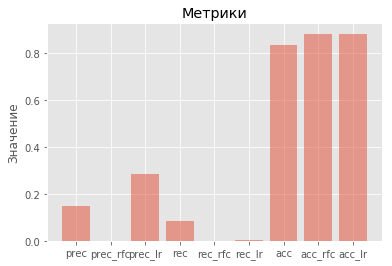

In [32]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt

objects = ('prec','prec_rfc','prec_lr', 'rec', 'rec_rfc', 'rec_lr','acc', 'acc_rfc', 'acc_lr')
y_pos = np.arange(len(objects))          
plt.bar(y_pos, p, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Значение')
plt.title('Метрики')
 
plt.show()


(-0.01, 1.01)

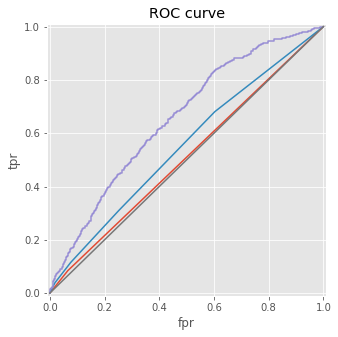

In [34]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_p[:,1])
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, predict_p_rfc[:,1])
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predict_p_lr[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [36]:
print('dtc ', roc_auc_score(y_test, predict_p[:,1]))
print
print('rfc ', roc_auc_score(y_test, predict_p_rfc[:,1]))
print
print('lr  ', roc_auc_score(y_test, predict_p_lr[:,1]))

dtc  0.5092661466673555
rfc  0.5496318106421934
lr   0.6545385149600244


In [49]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier()
cvs_dtc=cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
    
)
cvs_rfc=cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
    
)
cvs_lr=cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=10
    
)

In [50]:
import numpy
numpy.mean(cvs_dtc), numpy.mean(cvs_rfc), numpy.mean(cvs_lr)


(0.5079105220351904, 0.5495849339925176, 0.6478204339856828)

In [51]:
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)

In [52]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_p_lr = lr.predict_proba(X_test)
## Your Code Here

In [53]:
predict_p_lr

array([[0.93896958, 0.06103042],
       [0.86783901, 0.13216099],
       [0.88195622, 0.11804378],
       ...,
       [0.82981648, 0.17018352],
       [0.84668967, 0.15331033],
       [0.89052927, 0.10947073]])

In [55]:
# Померить roc_auc на тесте

print('lr  ', roc_auc_score(y_test, predict_p_lr[:,1]))

lr   0.6531722105777843
